## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

## Loading the sklearn's wines dataset

In [2]:
df = pd.read_csv('data/spotify_project.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.duplicated().value_counts()

False    34181
dtype: int64

In [5]:
X = df[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo","id"]]

In [6]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,0.615,0.7790,-6.454,0.1350,0.0665,0.000000,0.1550,0.453,160.000,7zgqtptZvhf8GEmdsM2vp2
1,0.687,0.8450,-4.370,0.0576,0.1000,0.000000,0.0452,0.809,87.972,4Vxu50qVrQcycjRyJQaZLC
2,0.818,0.8030,-4.282,0.0797,0.0340,0.000000,0.1530,0.632,106.970,6b8Be6ljOzmkOmFslEb23P
3,0.624,0.8760,-3.374,0.1000,0.0735,0.000000,0.3270,0.781,99.943,0afhq8XCExXpqazXczTSve
4,0.614,0.3790,-10.480,0.0476,0.6070,0.000464,0.0986,0.201,107.989,1HNkqx9Ahdgi1Ixy2xkKkL
...,...,...,...,...,...,...,...,...,...,...
34176,0.608,0.7450,-4.130,0.0277,0.0226,0.000006,0.0942,0.464,102.025,48UKTR66uUOT9LaUvooTNx
34177,0.467,0.8280,-2.220,0.0489,0.1810,0.000000,0.1020,0.334,79.978,3nhGk6VnrDHy67pXvMhdPa
34178,0.545,0.7790,-6.235,0.0751,0.2430,0.000002,0.1230,0.303,150.002,1DmW5Ep6ywYwxc2HMT5BG6
34179,0.539,0.5080,-6.050,0.0288,0.7270,0.000000,0.1740,0.227,101.358,0T5iIrXA4p5GsubkhuBIKV


## Scaling features

In [7]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,0.615,0.7790,-6.454,0.1350,0.0665,0.000000,0.1550,0.453,160.000,7zgqtptZvhf8GEmdsM2vp2
1,0.687,0.8450,-4.370,0.0576,0.1000,0.000000,0.0452,0.809,87.972,4Vxu50qVrQcycjRyJQaZLC
2,0.818,0.8030,-4.282,0.0797,0.0340,0.000000,0.1530,0.632,106.970,6b8Be6ljOzmkOmFslEb23P
3,0.624,0.8760,-3.374,0.1000,0.0735,0.000000,0.3270,0.781,99.943,0afhq8XCExXpqazXczTSve
4,0.614,0.3790,-10.480,0.0476,0.6070,0.000464,0.0986,0.201,107.989,1HNkqx9Ahdgi1Ixy2xkKkL
...,...,...,...,...,...,...,...,...,...,...
34176,0.608,0.7450,-4.130,0.0277,0.0226,0.000006,0.0942,0.464,102.025,48UKTR66uUOT9LaUvooTNx
34177,0.467,0.8280,-2.220,0.0489,0.1810,0.000000,0.1020,0.334,79.978,3nhGk6VnrDHy67pXvMhdPa
34178,0.545,0.7790,-6.235,0.0751,0.2430,0.000002,0.1230,0.303,150.002,1DmW5Ep6ywYwxc2HMT5BG6
34179,0.539,0.5080,-6.050,0.0288,0.7270,0.000000,0.1740,0.227,101.358,0T5iIrXA4p5GsubkhuBIKV


In [8]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,34181.000000,34181.000000,34181.000000,34181.000000,34181.000000,34181.000000,34181.000000,34181.000000,34181.000000
mean,0.578081,0.654575,-7.868347,0.072020,0.246159,0.098012,0.191394,0.512242,121.376052
std,0.161977,0.224340,4.084386,0.076509,0.293147,0.238527,0.160126,0.252120,27.770202
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474000,0.510000,-9.717000,0.033900,0.015500,0.000000,0.093600,0.313000,100.610000
50%,0.589000,0.696000,-6.929000,0.044600,0.104000,0.000073,0.126000,0.511000,120.507000
75%,0.694000,0.835000,-5.079000,0.072500,0.407000,0.014000,0.246000,0.718000,137.074000
max,0.980000,1.000000,1.342000,0.963000,0.996000,0.999000,0.997000,0.994000,240.107000


The scale of "proline" is much bigger than the scale of many other variable!

**K-Means is a distance based algorithm**: we need to scale / normalize!:

In [9]:
X_num = X.select_dtypes(np.number)

In [10]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled_df = pd.DataFrame(X_scaled, columns = X_num.columns)
#display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.227928,0.554635,0.346286,0.823181,-0.612872,-0.410910,-0.227288,-0.234979,1.390862
1,0.672441,0.848835,0.856530,-0.188474,-0.498593,-0.410910,-0.913009,1.177067,-1.202892
2,1.481207,0.661617,0.878076,0.100384,-0.723739,-0.410910,-0.239778,0.475010,-0.518767
3,0.283492,0.987020,1.100389,0.365714,-0.588993,-0.410910,0.846883,1.066008,-0.771812
4,0.221754,-1.228395,-0.639433,-0.319179,1.230940,-0.408964,-0.579516,-1.234518,-0.482072


In [11]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,3.418100e+04,3.418100e+04,3.418100e+04,3.418100e+04,3.418100e+04,3.418100e+04,3.418100e+04,3.418100e+04,3.418100e+04
mean,-4.831050e-16,-7.150952e-17,8.938690e-17,-2.161916e-17,-3.326024e-18,2.328217e-17,-6.111570e-17,-8.813964e-17,1.172424e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-3.568955e+00,-2.917817e+00,-1.276383e+01,-9.413338e-01,-8.397237e-01,-4.109097e-01,-1.195291e+00,-2.031769e+00,-4.370794e+00
25%,-6.425770e-01,-6.444530e-01,-4.526214e-01,-4.982445e-01,-7.868485e-01,-4.109097e-01,-6.107421e-01,-7.902787e-01,-7.477927e-01
50%,6.740908e-02,1.846560e-01,2.299882e-01,-3.583903e-01,-4.849478e-01,-4.106037e-01,-4.083982e-01,-4.926788e-03,-3.129486e-02
75%,7.156573e-01,8.042590e-01,6.829393e-01,6.276094e-03,5.486782e-01,-3.522154e-01,3.410233e-01,8.161229e-01,5.652886e-01
max,2.481362e+00,1.539759e+00,2.255047e+00,1.164554e+01,2.557938e+00,3.777354e+00,5.031153e+00,1.910856e+00,4.275543e+00


Now, all features will have the same weight.

## Clustering the wines with K-Means

We will pick manually the number of clusters we want - let's set it to 8. Later we will discuss how many clusters should we have.

When randomness is involved (remember, **K-means picks randomly the initial centroids**), we better use a random seed so that we can reproduce our results. We can set this directly to the argument **random_state**.

In [12]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_scaled_df)

/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1234)

In [18]:
X_scaled

array([[ 0.22792768,  0.55463478,  0.34628646, ..., -0.22728803,
        -0.23497937,  1.3908618 ],
       [ 0.67244072,  0.84883476,  0.85652978, ..., -0.91300875,
         1.17706749, -1.20289152],
       [ 1.48120749,  0.66161659,  0.87807557, ..., -0.23977839,
         0.47501049, -0.51876693],
       ...,
       [-0.20423777,  0.55463478,  0.39990608, ..., -0.42713377,
        -0.82994293,  1.03083035],
       [-0.24128053, -0.6533682 ,  0.44520119, ..., -0.10862961,
        -1.13139114, -0.720857  ],
       [-0.82779078, -2.51173144, -2.39859737, ..., -0.58326326,
        -1.46853716, -1.54747453]])

In [14]:
labels = kmeans.labels_
labels

array([1, 0, 0, ..., 1, 2, 2], dtype=int32)

In [19]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

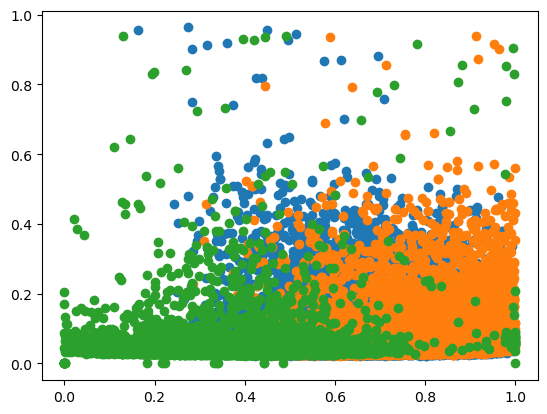

In [20]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

Now we have our "model", let's get the clusters and how many observations has each cluster.

In [21]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    14932
1    11967
2     7282
dtype: int64

In [22]:
clusters

array([1, 0, 0, ..., 1, 2, 2], dtype=int32)

Now let's see to which group was assigned every wine.

In [23]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

/var/folders/jz/4s7l0kcd7s57bvmy1ldx3n600000gn/T/ipykernel_2092/3390344749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,cluster
0,0.615,0.7790,-6.454,0.1350,0.0665,0.000000,0.1550,0.453,160.000,7zgqtptZvhf8GEmdsM2vp2,1
1,0.687,0.8450,-4.370,0.0576,0.1000,0.000000,0.0452,0.809,87.972,4Vxu50qVrQcycjRyJQaZLC,0
2,0.818,0.8030,-4.282,0.0797,0.0340,0.000000,0.1530,0.632,106.970,6b8Be6ljOzmkOmFslEb23P,0
3,0.624,0.8760,-3.374,0.1000,0.0735,0.000000,0.3270,0.781,99.943,0afhq8XCExXpqazXczTSve,0
4,0.614,0.3790,-10.480,0.0476,0.6070,0.000464,0.0986,0.201,107.989,1HNkqx9Ahdgi1Ixy2xkKkL,2
...,...,...,...,...,...,...,...,...,...,...,...
34176,0.608,0.7450,-4.130,0.0277,0.0226,0.000006,0.0942,0.464,102.025,48UKTR66uUOT9LaUvooTNx,0
34177,0.467,0.8280,-2.220,0.0489,0.1810,0.000000,0.1020,0.334,79.978,3nhGk6VnrDHy67pXvMhdPa,1
34178,0.545,0.7790,-6.235,0.0751,0.2430,0.000002,0.1230,0.303,150.002,1DmW5Ep6ywYwxc2HMT5BG6,1
34179,0.539,0.5080,-6.050,0.0288,0.7270,0.000000,0.1740,0.227,101.358,0T5iIrXA4p5GsubkhuBIKV,2


In [24]:
X[X['cluster'] == 2].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,cluster
28281,0.576,0.262,-12.592,0.0345,0.818,0.291,0.102,0.409,116.489,5PpBAGeNkIkfry2ZUq4DsD,2


## Playing with the parameters

**init**: those are the different initialization strategies. By default, sklearn is already using a 'smart' method, not the totally random one we saw.

**n_init**: By default, Scikit-Learn has tried 10 different random initializations and kept the best model.

[Scikitlearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

How does Scikit-Learn know which model is the best? It uses a performance metric called **inertia**. **It is the mean squared distance between each instance and its closest centroid**. It's stored in the inertia_ attribute of the model.

In [25]:
kmeans.inertia_

219569.83946157934

**max_iter**: It iterates up to 300 times by default (those are the re-computing centroids iterations we saw earlier)

**tol**: This is a way to determine when to stop iterating (if the clusters have changed only veeeery slightly, we assume we have achieved 'convergence')

**algorithm**: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

For learning purposes, we will tweak the parameters to replicate the good ol' K-Means - a bit dumber than the Scikit-Learn, yes, but also the original.

In [26]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

222985.65936139005


## Chosing K

We have used K=8 by default for now - but we know that 8 might not be the optimal number of clusters for our dataset. Having a metric like inertia, we can compute it for several K values and then use the "elbow method" to choose the best K.

We will now leave all other parameters with their default value, since it seems to work pretty well.

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 5 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 8 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 9 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 10 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 11 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 12 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 13 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 14 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 15 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 16 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 17 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 18 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 19 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 20 clusters! 



/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

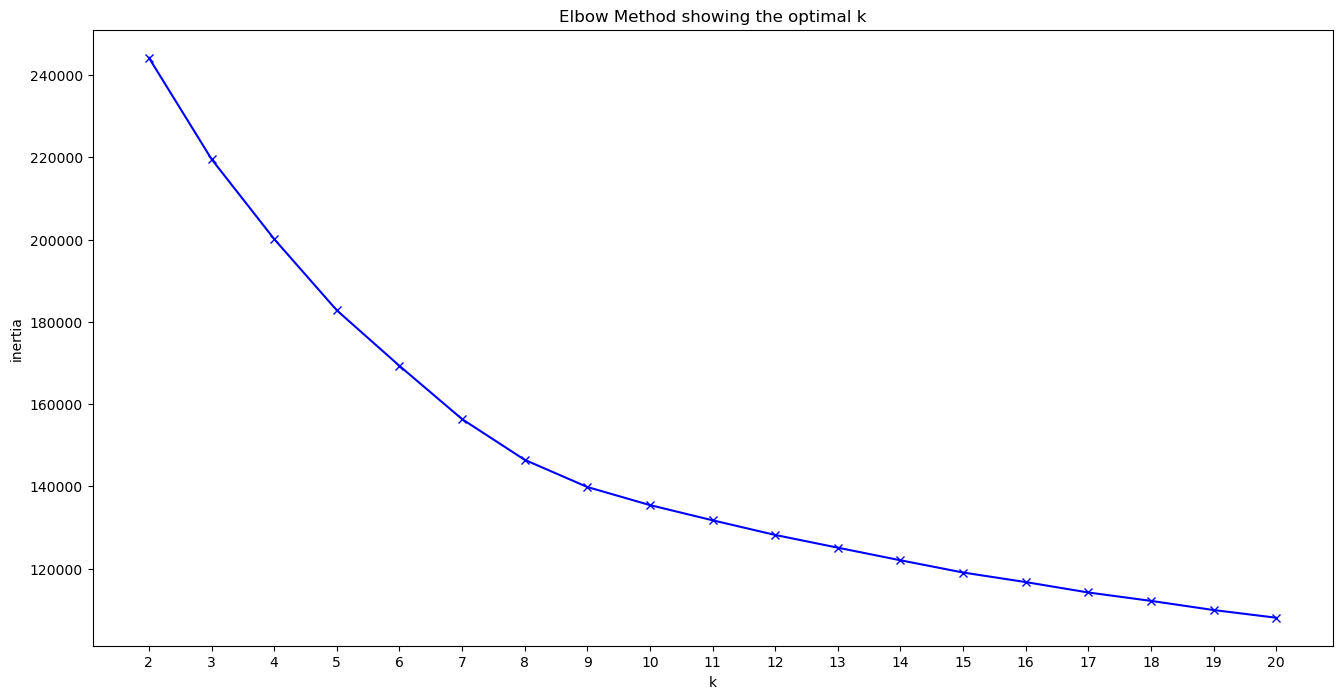

In [27]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at **k=3**, and then a very slight one at k=10, but other than that the plot is quite smooth. What if our business needs involve having a k between 5 and 8?

There is another metric that will help us decide.

## Silouhette

There's a metric called **Silhouette Score** that also measures how similar is an observation is to its own cluster compared to other clusters. For the ith observation, the **Silhouette Score** is:

$$s_{K,L} = (b - a) / max(a,b) $$

Where:

a = mean intra-cluster distance (the average distance between i and every other observation in the cluster where i belongs)

$$ a = \frac{1}{n_{K}}\sum_{i,j\neq{i}}^{n_{K}}d(i,j)$$

b = mean **nearest-cluster** distance (the average distance between i and the observations of the nearest cluster that i is not part of it)

$$ b = \frac{1}{(n_{K}*n_{L})}\sum_{i}^{n_{K}}\sum_{j}^{n_{L}}d(i,j)$$

The silhouette score for the whole model is the **average of all the silhouette scores** of each instance.

$$ S = \frac{2}{N(N-1)}\sum_{c}s_{K,L}$$

Because we divide the substraction of (b-a) by the max of the two distances (which will always be b unless the observation has been wrongly assigned to a cluster it should not belong), we obtain a "normalized score", that ranges from -1 to 1, and that makes it easier to interpret.

/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

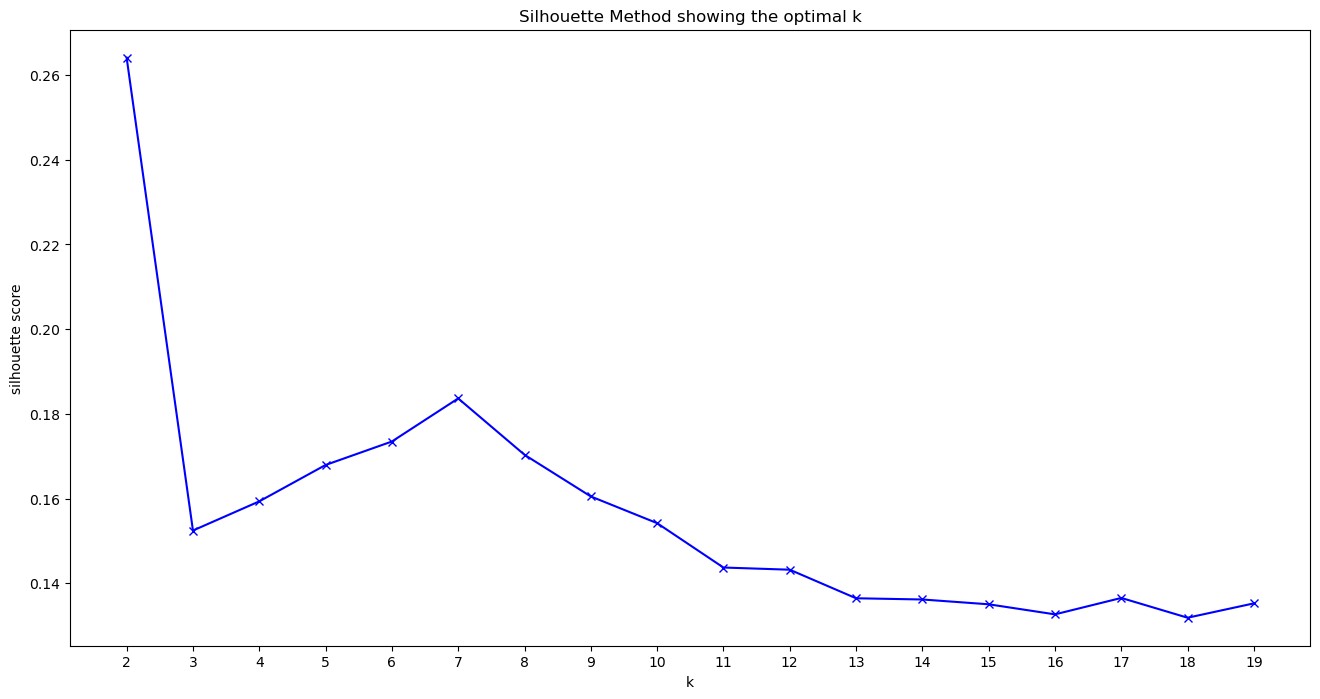

In [28]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

<b> advanced (optional)

In [ ]:
conda install -c districtdatalabs yellowbrick

/Users/philipplangfeldt/miniforge3/envs/iron_hack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


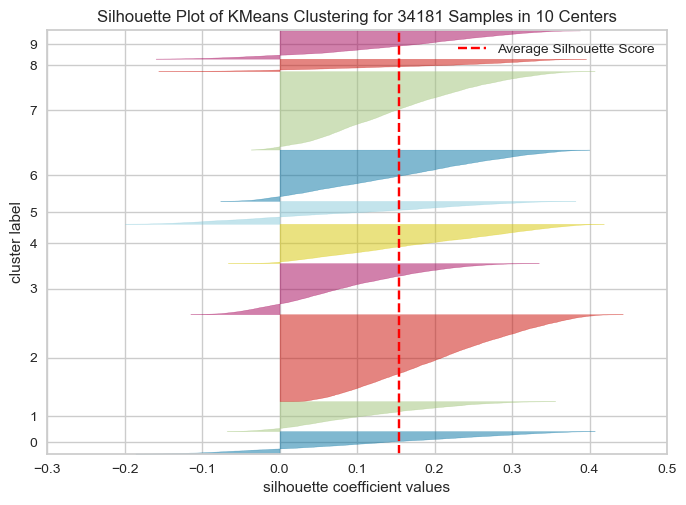

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 34181 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(10, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Here, we confirm that 3 is the best option, but we also notice that 5 a quite good - it meets the 'technical criteria' of having a better score than its predecessor (4), so if it falls within the range of our business demands - it looks like the best candidate.

# Saving with pickle

In [30]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

#with open("model/kmeans_4.pickle", "wb") as f:
 #   pickle.dump(kmeans,f)

In [32]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [57]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [58]:
scaler= load(filename="Model/scaler.pickle")

In [33]:
kmeans_model = load(filename="Model/kmeans_7.pickle")

In [60]:
kmeans_model

KMeans(random_state=1234)

In [61]:
scaler2 = load("Model/scaler.pickle")

In [ ]:
# user input a song
## get the audio features for the song from spotify 
## scale the audio features with scaler that you build the Kmean on 
## predict for the user song(audio features) in which cluster belong to (e.g belongs to 7 )
## got the 100,000000 database and recommed a song that belong to the same cluster of the user input song 

# Time to work!

Time to clusterize the songs in your database and see how they look like. 

In [34]:
X_num2 = df[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo"]]

In [35]:
scaler.fit(X_num2)
X_scaled2 = scaler.transform(X_num2)
X_scaled_df2 = pd.DataFrame(X_scaled2, columns = X_num2.columns)

In [36]:
clusters = kmeans_model.predict(X_scaled_df2)


In [46]:
df['cluster'] = clusters

In [51]:
df.to_csv('data/spotify_data_with_clusters.csv', index=False)